### Credit Card Fraud
Using this credit card fraud dataset develop an algorithm to predict fraud. Prioritize correctly finding fraud rather than correctly labeling non-fraudulent transactions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix


import warnings
warnings.simplefilter('ignore')

#### Data

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.columns = [lbl.lower() for lbl in df.columns if lbl != 'Class'] + ['fraud']

#### Feature Engineering
 - Infuse Domain Knowledge
 - Create Interaction Features
 - Combine Sparse Classes
 - Add Dummy Variables
 - Remove Unused Features
 
 analytical base table (ABT)

In [5]:
X = df.drop(['time', 'amount', 'fraud'], axis=1)
y = df['fraud']
X_std = StandardScaler().fit_transform(X)
X_rbt = RobustScaler().fit_transform(X)

X_trn_std, X_tst_std, y_trn_std, y_tst_std = train_test_split(X_std, y, test_size=0.2, random_state=9, stratify=y)

#### Algorithm Selection
KNN classifier ran for 30 mintues plus

Results
- 'RF': 0.7296747967479674,
- 'SVM': 0.3861788617886179,
- 'Logit': 0.5955284552845529


In [6]:
# run classifiers with default hyperparameters for algorithim selection
clf_lrn  = LogisticRegression()
clf_rft  = RandomForestClassifier(random_state=1)
clf_svc = SVC(random_state=1)
clfs = [clf_lrn, clf_rft, clf_svc]




In [1]:
names = ['logit', 'rnd_frst', 'svm_clf']
{i:name for (i,name) in enumerate(names) }

{0: 'logit', 1: 'rnd_frst', 2: 'svm_clf'}

In [ ]:
names = ['logit', 'Random Forest', 'SVM classifier']
scores = {}
clfs = [clf_lrn, clf_rft, clf_svc]

for (i, clf) in enumerate(clfs):
    scores[i] = clf.score(X_tst, y_tst)


In [ ]:
#nme = 'RF';  clf = clf_rft ; 
#nme = 'SVM';  clf = clf_svc ; 
#nme = 'Logit';  clf = clf_lrn ;

In [ ]:
tru_pos[nme] = tp / (fn + tp)
tru_pos

In [15]:
prms[5]

{'min_samples_leaf': 3, 'n_estimators': 20}

In [12]:
param_grid = {'n_estimators': [10, 20, 50, 100],
              'min_samples_leaf': [1, 3, 5]}

prms =list(ParameterGrid(param_grid))

#### Hyperparameter Selection

- 0 : 0.7041
- 1 : 0.7551
- 2 : 0.7449
- 3 : 0.7347
- 4 : 0.7347
- 5 : **0.7653** 
- 6 : 0.7449
- 7 : 0.7449
- 8 : 0.7245
- 9 : 0.7041
- 10 : 0.7143
- 11 : 0.7143

prms[5] = **{'min_samples_leaf': 3, 'n_estimators': 20}**

In [13]:
for i in range(len(prms)):
    y_prd = clf_rft.set_params(**prms[i]).fit(X_trn_std, y_trn_std).predict(X_tst_std) 
    tn, fp, fn, tp = confusion_matrix(y_tst_std, y_prd).ravel()
    print(i, ':', np.round(tp / (fn + tp), decimals = 4))    

0 : 0.7041
1 : 0.7551
2 : 0.7449
3 : 0.7347
4 : 0.7347
5 : 0.7653
6 : 0.7449
7 : 0.7449
8 : 0.7245
9 : 0.7041
10 : 0.7143
11 : 0.7143


In [ ]:
rsts = []
for (i, prm ) in enumerate(prms):
    y_prd = clf_rft.set_params(**prm).fit(X_trn_std, y_trn_std).predict(X_tst_std) 
    tn, fp, fn, tp = confusion_matrix(y_tst_std, y_prd).ravel()
    print(i, ':', np.round( tp / (fn + tp),))


In [ ]:
 tp / (fn + tp)

In [ ]:
scores = {}
cross_val_score(clf_lrn,  X=X_std_trn, y=y_std_trn, cv=skf, n_jobs=1)
scores['Logit'] = cross_val_score(clf_lrn,  X=X_std_trn, y=y_std_trn, cv=skf, n_jobs=1)

In [ ]:
scores = {}
for (nme, est) in zip(nme, est):
    scores[nme] = cross_val_score(clf_lrn,  X=X_std_trn, y=y_std_trn, cv=skf, n_jobs=1)
scores

#### Exploratory Analysis
 - Start with Basics
 - Plot Numerical Distributions
 - Plot Categorical Distributions
 - Plot Segmentations
 - Study Correlations

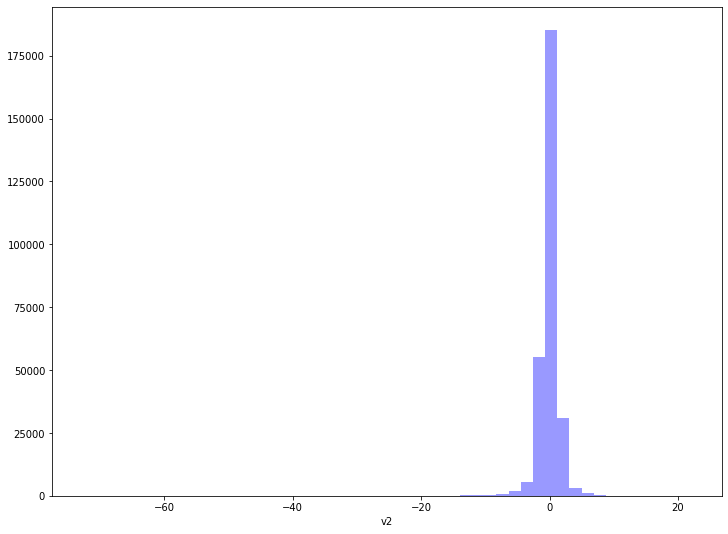

In [3]:
f, ax = plt.subplots(figsize=(12, 9))
sns.distplot(df.v2, color="b", kde = False,  ax=ax)
plt.show()

In [4]:
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
